In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import GridSearchCV

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
passengerId = test['PassengerId']

titanic_df = pd.concat([train, test])
titanic_df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:

train_index = len(train)
test_index = len(titanic_df) - len(test)

In [11]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Survived

In [12]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [13]:
titanic_df['Survived'].unique()
titanic_df['Survived'].nunique()
titanic_df['Survived'].value_counts()
titanic_df['Name'].value_counts().sum()

1309

<Axes: xlabel='Survived', ylabel='count'>

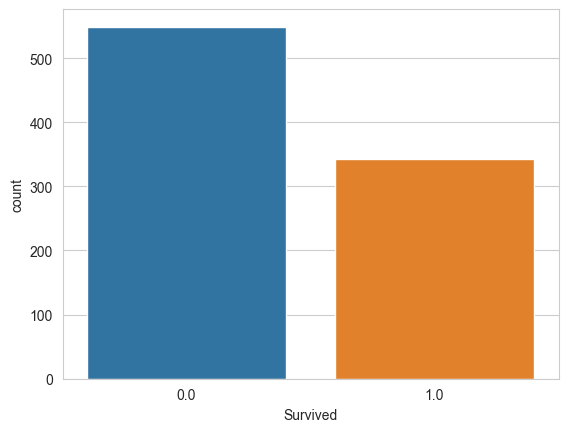

In [14]:
sns.countplot(data=titanic_df, x='Survived')


Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
 Survived
0.0    549
1.0    342
Name: count, dtype: int64


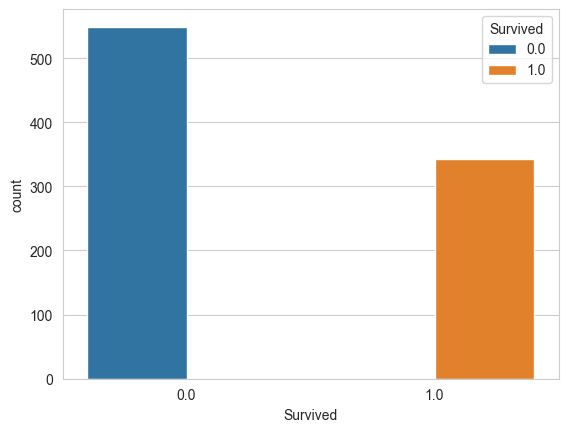

In [15]:
def titanic_func(data, column, count=True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n {data[column].value_counts()}')

    if count == True:
        sns.countplot(data=data, x=column, hue= 'Survived')

    else:
        sns.displot(data[column], kde=True)

titanic_func(titanic_df, 'Survived')

In [16]:
df = pd.DataFrame()
df['PassengerId'] = titanic_df['PassengerId']
df['Survived'] = titanic_df['Survived']

PCLASS

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
 Pclass
3    709
1    323
2    277
Name: count, dtype: int64


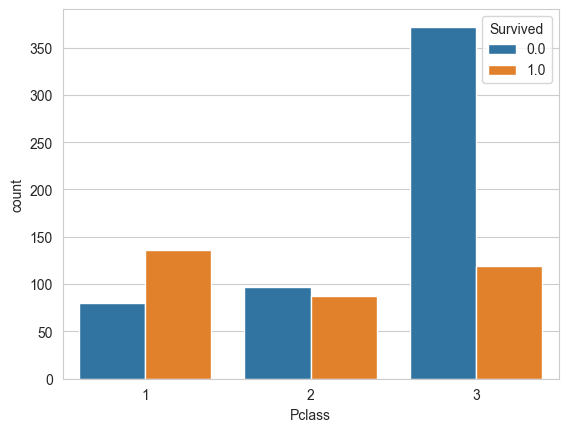

In [17]:
titanic_func(titanic_df, 'Pclass')


In [18]:
df['Pclass'] = titanic_df['Pclass']
df.head()

,PassengerId,Survived,Pclass
0,1,0.0,3
1,2,1.0,1
2,3,1.0,3
3,4,1.0,1
4,5,0.0,3


Sex

In [19]:
#titanic_df['Sex'].map({'female': 1 , 'male': 0})
titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'],[0,1]) #Método com replace


Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
 Sex
0    843
1    466
Name: count, dtype: int64


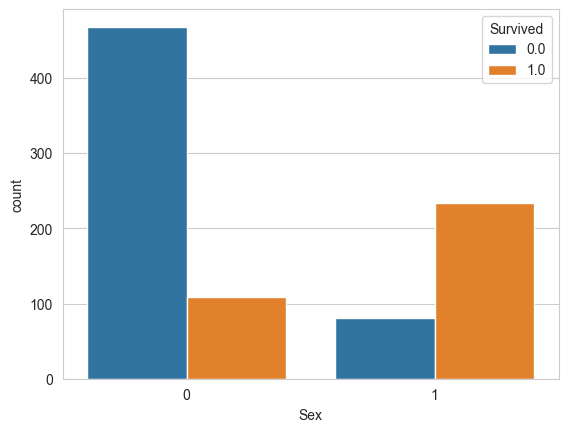

In [20]:

titanic_func(titanic_df, 'Sex')

In [21]:
df['Sex'] = titanic_df['Sex']
df.head()

,PassengerId,Survived,Pclass,Sex
0,1,0.0,3,0
1,2,1.0,1,1
2,3,1.0,3,1
3,4,1.0,1,1
4,5,0.0,3,0


Age

Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opção: 
 Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


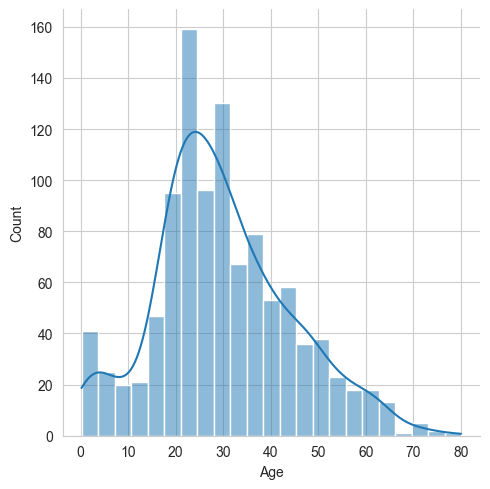

In [22]:
titanic_func(titanic_df, 'Age', False)

In [23]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 1309, dtype: float64

Matriz de Correlação

In [24]:
titanic_numeric_columns = titanic_df.select_dtypes(include='number')
correlation_matrix = titanic_numeric_columns.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


Definir Média de Idade a partir de Classe Social

In [25]:
# titanic_df[titanic_df['Pclass']==1]['Age'].mean()
# titanic_df[titanic_df['Pclass']==2]['Age'].mean()
# titanic_df[titanic_df['Pclass']==3]['Age'].mean()


for i in sorted(titanic_df['Pclass'].unique()):
    print(f'Pessoas da {i}ª Classe tem a média de idade de: {titanic_df[titanic_df["Pclass"]== i ]["Age"].mean():.0f}')

Pessoas da 1ª Classe tem a média de idade de: 39
Pessoas da 2ª Classe tem a média de idade de: 30
Pessoas da 3ª Classe tem a média de idade de: 25


In [26]:
titanic_df['Age'].isnull().sum()

263

In [27]:
df_age_mean_pclass_1 = titanic_df[titanic_df['Pclass']==1].groupby('Pclass')['Age'].mean()
df_age_mean_pclass_2 = titanic_df[titanic_df['Pclass']==2].groupby('Pclass')['Age'].mean()
df_age_mean_pclass_3 = titanic_df[titanic_df['Pclass']==3].groupby('Pclass')['Age'].mean()

df['Age'] = titanic_df['Age'].fillna(titanic_df['Pclass'].map({1: df_age_mean_pclass_1.loc[1], 2: df_age_mean_pclass_2.loc[2], 3: df_age_mean_pclass_3.loc[3]})).round(0)


In [28]:
titanic_df['Age'].isnull().sum()

263

In [29]:
df.tail(500)

,PassengerId,Survived,Pclass,Sex,Age
809,810,1.0,1,1,33.0
810,811,0.0,3,0,26.0
811,812,0.0,3,0,39.0
812,813,0.0,2,0,35.0
813,814,0.0,3,1,6.0
...,...,...,...,...,...
413,1305,NaN,3,0,25.0
414,1306,NaN,1,1,39.0
415,1307,NaN,3,0,38.0
416,1308,NaN,3,0,25.0


SibSp

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
 SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


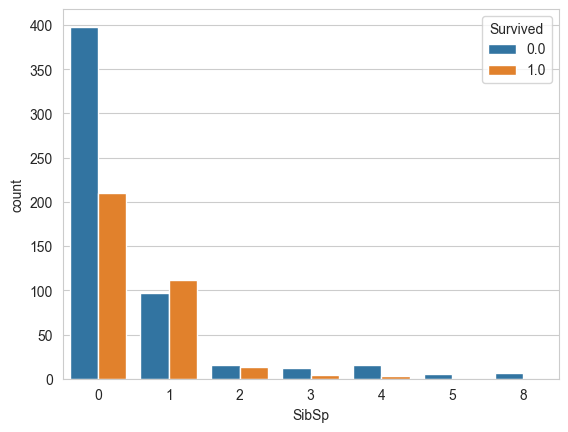

In [30]:
titanic_func(titanic_df, 'SibSp')

In [31]:
df['SibSP'] = titanic_df['SibSp']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSP
0,1,0.0,3,0,22.0,1
1,2,1.0,1,1,38.0,1
2,3,1.0,3,1,26.0,0
3,4,1.0,1,1,35.0,1
4,5,0.0,3,0,35.0,0
...,...,...,...,...,...,...
413,1305,NaN,3,0,25.0,0
414,1306,NaN,1,1,39.0,0
415,1307,NaN,3,0,38.0,0
416,1308,NaN,3,0,25.0,0


Parch

In [32]:
df['Parch'] = titanic_df['Parch']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSP,Parch
0,1,0.0,3,0,22.0,1,0
1,2,1.0,1,1,38.0,1,0
2,3,1.0,3,1,26.0,0,0
3,4,1.0,1,1,35.0,1,0
4,5,0.0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
413,1305,NaN,3,0,25.0,0,0
414,1306,NaN,1,1,39.0,0,0
415,1307,NaN,3,0,38.0,0,0
416,1308,NaN,3,0,25.0,0,0


FamilySize

In [33]:
df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
df

,PassengerId,Survived,Pclass,Sex,Age,SibSP,Parch,FamilySize
0,1,0.0,3,0,22.0,1,0,2
1,2,1.0,1,1,38.0,1,0,2
2,3,1.0,3,1,26.0,0,0,1
3,4,1.0,1,1,35.0,1,0,2
4,5,0.0,3,0,35.0,0,0,1
...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,25.0,0,0,1
414,1306,NaN,1,1,39.0,0,0,1
415,1307,NaN,3,0,38.0,0,0,1
416,1308,NaN,3,0,25.0,0,0,1


Fare

Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

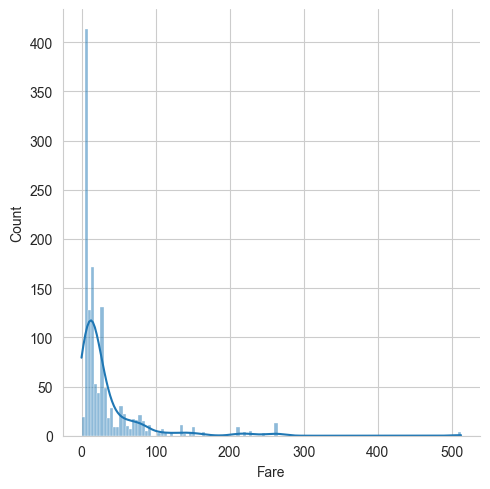

In [34]:
titanic_func(titanic_df, 'Fare', False)

In [35]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [36]:
titanic_df[titanic_df['Pclass']==3]['Fare'].mean()

13.302888700564973

In [37]:
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass']==3]['Fare'].mean(), inplace=True)

In [38]:
df['Fare'] = titanic_df['Fare']

Embarked

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
 Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


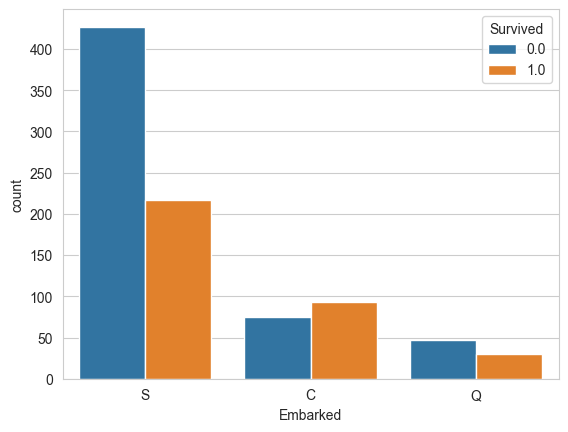

In [39]:
titanic_func(titanic_df, 'Embarked')

In [40]:
titanic_df[titanic_df['Embarked']== 'C']['Survived'].mean()
titanic_df[titanic_df['Embarked']== 'S']['Survived'].mean()
titanic_df[titanic_df['Embarked']== 'Q']['Survived'].mean()

0.38961038961038963

In [41]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [42]:
titanic_df['Embarked'].fillna('C', inplace = True)
df['Embarked'] = titanic_df['Embarked']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSP,Parch,FamilySize,Fare,Embarked
0,1,0.0,3,0,22.0,1,0,2,7.2500,S
1,2,1.0,1,1,38.0,1,0,2,71.2833,C
2,3,1.0,3,1,26.0,0,0,1,7.9250,S
3,4,1.0,1,1,35.0,1,0,2,53.1000,S
4,5,0.0,3,0,35.0,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,25.0,0,0,1,8.0500,S
414,1306,NaN,1,1,39.0,0,0,1,108.9000,C
415,1307,NaN,3,0,38.0,0,0,1,7.2500,S
416,1308,NaN,3,0,25.0,0,0,1,8.0500,S


Name

In [43]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['Title'] = titanic_df['Title']
df


,PassengerId,Survived,Pclass,Sex,Age,SibSP,Parch,FamilySize,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,2,7.2500,S,Mr
1,2,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs
2,3,1.0,3,1,26.0,0,0,1,7.9250,S,Miss
3,4,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs
4,5,0.0,3,0,35.0,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,25.0,0,0,1,8.0500,S,Mr
414,1306,NaN,1,1,39.0,0,0,1,108.9000,C,Dona
415,1307,NaN,3,0,38.0,0,0,1,7.2500,S,Mr
416,1308,NaN,3,0,25.0,0,0,1,8.0500,S,Mr


In [44]:
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [45]:
df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in df['Title']]

In [46]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSP', 'Parch', 'FamilySize', 'Fare', 'Embarked', 'Title']]

In [47]:
df = df.reset_index()
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSP', 'Parch', 'FamilySize', 'Fare', 'Embarked', 'Title']]
df

,Survived,Pclass,Sex,Age,SibSP,Parch,FamilySize,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,1,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39.0,0,0,1,108.9000,C,Person
1306,NaN,3,0,38.0,0,0,1,7.2500,S,Mr
1307,NaN,3,0,25.0,0,0,1,8.0500,S,Mr


In [48]:
pclass = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
title = pd.get_dummies(df['Title'], prefix='Title', drop_first=True)
embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)


In [49]:
embarked

,Embarked_Q,Embarked_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
1304,False,True
1305,False,False
1306,False,True
1307,False,True


In [50]:
titanic_full = pd.concat([df, pclass, title, embarked], axis=1)
titanic_full.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace=True)

In [51]:
titanic_full

,Survived,Sex,Age,SibSP,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,0,2,7.2500,False,True,False,True,False,False,False,True
1,1.0,1,38.0,1,0,2,71.2833,False,False,False,False,True,False,False,False
2,1.0,1,26.0,0,0,1,7.9250,False,True,True,False,False,False,False,True
3,1.0,1,35.0,1,0,2,53.1000,False,False,False,False,True,False,False,True
4,0.0,0,35.0,0,0,1,8.0500,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,0,1,8.0500,False,True,False,True,False,False,False,True
1305,NaN,1,39.0,0,0,1,108.9000,False,False,False,False,False,True,False,False
1306,NaN,0,38.0,0,0,1,7.2500,False,True,False,True,False,False,False,True
1307,NaN,0,25.0,0,0,1,8.0500,False,True,False,True,False,False,False,True


In [52]:
# train = titanic_full[:train_index].drop()
# test = titanic_full[:test_index].drop()
train = titanic_full.drop(titanic_full.index[train_index:]).copy()
test = titanic_full.drop(titanic_full.index[:test_index]).copy()


In [53]:
test[['Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Person', 'Embarked_Q', 'Embarked_S']] = test[['Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Person', 'Embarked_Q', 'Embarked_S']].astype(int)
train[['Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Person', 'Embarked_Q', 'Embarked_S']] = train[['Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Person', 'Embarked_Q', 'Embarked_S']].astype(int)

In [54]:
train['Survived'] = train['Survived'].astype(int)
train

,Survived,Sex,Age,SibSP,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,1,13.0000,1,0,0,0,0,1,0,1
887,1,1,19.0,0,0,1,30.0000,0,0,1,0,0,0,0,1
888,0,1,25.0,1,2,4,23.4500,0,1,1,0,0,0,0,1
889,1,0,26.0,0,0,1,30.0000,0,0,0,1,0,0,0,0


In [55]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X_test = test.drop('Survived', axis=1)

Machine Learnig

In [56]:
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train)*100, 2)

    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv=vc, n_jobs=-1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred)*100,2)

    return acuracia, acuracia_vc

In [57]:
#Random Forest

acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y, 10)

print(f'Acurácia: {acc_rf}')
print(f'Acurácia Validação Cruzada: {acc_vc_rf}')

Acurácia: 98.32
Acurácia Validação Cruzada: 80.58


In [58]:
#Logistic Regression

acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter=1000), X, y, 10)

print(f'Acurácia: {acc_log}')
print(f'Acurácia Validação Cruzada: {acc_vc_log}')

Acurácia: 82.94
Acurácia Validação Cruzada: 82.49


In [59]:
#K-Nearest Neighbours

acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f'Acurácia: {acc_knn}')
print(f'Acurácia Validação Cruzada: {acc_vc_knn}')

Acurácia: 80.92
Acurácia Validação Cruzada: 72.39


In [60]:
#Gaussian Naive Beyes

acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 10)

print(f'Acurácia: {acc_gaussian}')
print(f'Acurácia Validação Cruzada: {acc_vc_gaussian}')

Acurácia: 78.68
Acurácia Validação Cruzada: 78.56


In [61]:
# Linear Suport Vector Machines (SVC)

acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual=False), X, y, 10)

print(f'Acurácia: {acc_linear_svc}')
print(f'Acurácia Validação Cruzada: {acc_vc_linear_svc}')

Acurácia: 83.28
Acurácia Validação Cruzada: 82.72


In [62]:
# Stochastic Gradient Descent

acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 10)

print(f'Acurácia: {acc_sgd}')
print(f'Acurácia Validação Cruzada: {acc_vc_sgd}')

Acurácia: 65.43
Acurácia Validação Cruzada: 69.14


In [63]:
# Decision Tree Classifiers

acc_dt, acc_vc_dt = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f'Acurácia: {acc_dt}')
o=print(f'Acurácia Validação Cruzada: {acc_vc_dt}')

Acurácia: 98.32
Acurácia Validação Cruzada: 79.46


In [64]:
#Gradient Boost Tree

acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f'Acurácia: {acc_gbt}')
print(f'Acurácia Validação Cruzada: {acc_vc_dt}')

Acurácia: 89.67
Acurácia Validação Cruzada: 79.46


In [65]:
# # Linear Suport Vector Machines (SVC)

# acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual=False), X, y, 10)

# print(f'Acurácia: {acc_linear_svc}')
# print(f'Acurácia Validação Cruzada: {acc_vc_linear_svc}')

In [66]:
params = dict(
    max_depth = [n for n in range(1,5)],
    min_samples_split = [n for n in range(2,6)],
    min_samples_leaf = [n for n in range(2,6)],
    n_estimators = [n for n in range(10, 50, 10)]
)

In [67]:
gbc = GradientBoostingClassifier()
gbc_vc = GridSearchCV(estimator=gbc, param_grid=params, cv=10)

In [68]:
gbc_vc.fit(X,y)

In [ ]:
gbc_vc.best_score_
gbc_vc.best_estimator_

GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=4,
                           n_estimators=30)

In [ ]:
gbc_vc.best_score_

0.8462671660424469

In [ ]:
GradientBoostingClassifier_pred = gbc_vc.predict(X_test)

In [ ]:
kaggle = pd.DataFrame({'PassengerId':passengerId, 'Survived':GradientBoostingClassifier_pred })
kaggle.to_csv('Titanic_Gradientboosting_Pred.csv', index=False)

TypeError: data type 'o' not understood